<a href="https://colab.research.google.com/github/DharshiniRaguraman/Handwritten-Digit-Recogonition-with-ANN/blob/main/HandwrittenDigitRecognitionwithANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 677.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files
from PIL import Image

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8275 - loss: 0.6285
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9482 - loss: 0.1827
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9646 - loss: 0.1228
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9714 - loss: 0.0971
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9783 - loss: 0.0774
Upload a 28x28 image of a digit:


Saving 63661cf7a3df52dce5e2c8d0419c20e5_t.jpeg to 63661cf7a3df52dce5e2c8d0419c20e5_t (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


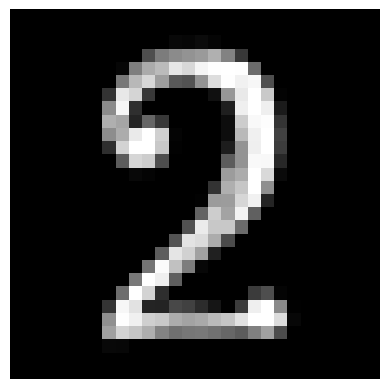

Predicted digit: 2


In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 10)

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense

model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, epochs=5, batch_size=128, verbose=1)
print("Upload a 28x28 image of a digit:")
uploaded = files.upload()
for fname in uploaded:
  img = Image.open(fname).convert('L').resize((28,28))
  img_arr = np.invert(np.array(img))/255.0
  img_arr = img_arr.reshape(1,28,28)
  prediction = model.predict(img_arr)
  predicted_img = np.argmax(prediction)
  plt.imshow(img_arr.reshape(28,28), cmap='gray')
  plt.axis('off')
  plt.show()
  print("Predicted digit:", predicted_img)